C:\Users\Manvi Bhala\AppData\Local\Temp\ipykernel_11436\3357391626.py:9: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StarClassificationDataset.csv")


Missing values in 'class': 0
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
        STAR       0.99      1.00      1.00      4319
         QSO       0.97      0.94      0.95      3792

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



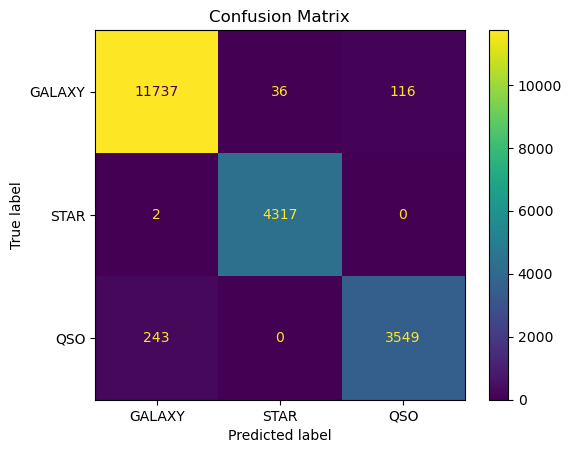

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv("StarClassificationDataset.csv")
df = df.drop('object_ID', axis=1)

df['class'] = df['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})

print("Missing values in 'class':", df['class'].isnull().sum())

df.dropna(subset=['class'], inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.strip(), errors='coerce')  
df.dropna(axis=1, how='all', inplace=True)

X_stellar = df.drop('class', axis=1)
y_stellar = df['class']

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(X_stellar, y_stellar):
    xtrain, xtest = X_stellar.iloc[train_index], X_stellar.iloc[test_index]
    ytrain, ytest = y_stellar.iloc[train_index], y_stellar.iloc[test_index]

model_stellar = RandomForestClassifier(random_state=42)
model_stellar.fit(xtrain, ytrain)

ypred = model_stellar.predict(xtest)

print("Classification Report:")
print(classification_report(ytest, ypred, target_names=['GALAXY', 'STAR', 'QSO']))

cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['GALAXY', 'STAR', 'QSO'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

housing_df = pd.read_csv("housing.csv")
numeric_cols = housing_df.select_dtypes(include=[np.number]).columns
housing_df[numeric_cols] = housing_df[numeric_cols].fillna(housing_df[numeric_cols].mean())

categorical_cols = housing_df.select_dtypes(include=['object']).columns
housing_df[categorical_cols] = housing_df[categorical_cols].fillna(housing_df[categorical_cols].mode().iloc[0])

print("Unique values in 'ocean_proximity':", housing_df['ocean_proximity'].unique())

housing_df = pd.get_dummies(housing_df, columns=['ocean_proximity'], drop_first=True)

n_bins = int(np.ceil(1 + np.log2(len(housing_df))))
housing_df['price_bin'] = pd.cut(housing_df['median_house_value'], bins=n_bins, labels=False)

X_housing = housing_df.drop(['median_house_value', 'price_bin'], axis=1)
y_housing = housing_df['median_house_value']

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(X_housing, housing_df['price_bin']):
    X_train, X_test = X_housing.iloc[train_index], X_housing.iloc[test_index]
    y_train, y_test = y_housing.iloc[train_index], y_housing.iloc[test_index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=0.01)  
lasso_model = Lasso(alpha=0.01) 

ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    return mae, mse, rmse

ridge_metrics = evaluate_model(y_test, y_pred_ridge, "Ridge")
lasso_metrics = evaluate_model(y_test, y_pred_lasso, "Lasso")

Unique values in 'ocean_proximity': ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
Ridge Evaluation:
MAE: 49455.21
MSE: 4588598696.61
RMSE: 67739.20
Lasso Evaluation:
MAE: 49455.22
MSE: 4588598223.35
RMSE: 67739.19
